<a href="https://www.kaggle.com/code/ellekayem/linear-regression?scriptVersionId=127738072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Exploratory Analysis with Linear Regressions


### Analysis by Lauren Main

### Feature Tasks Version 1.0

* [Read and Display the Data Set](#section-one)
* [Describe the Data Set ](#section-two)
* [Train](#section-three)
* [Test](#section-four)
* [Conclusions](#section-five)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


<a id="section-one"></a>

## Read and Display the Data Set

In [2]:
df = pd.read_csv('/kaggle/input/calcofi/bottle.csv', low_memory = False)
df_subset = df[['Salnty', 'T_degC']]
df_subset.columns = ['Salinity', 'Temperature in Celsius']
df_subset = df_subset.loc[df_subset['Salinity'].notna() & df_subset['Temperature in Celsius'].notna()]
df_subset.head()

,Salinity,Temperature in Celsius
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


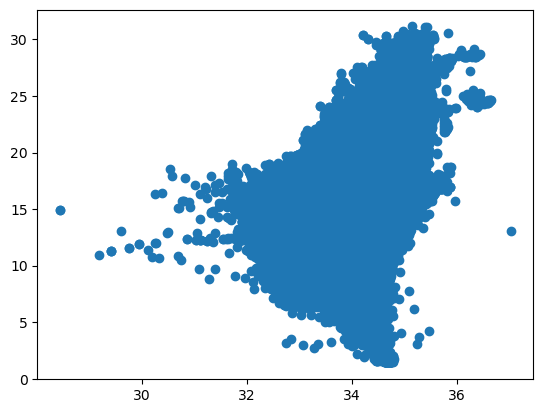

In [3]:
plt.scatter(df_subset['Salinity'],df_subset['Temperature in Celsius'] )
plt.show()

<a id="section-two"></a>
## Describe the Data Set

In [4]:
df_subset.describe()

,Salinity,Temperature in Celsius
count,814247.000000,814247.000000
mean,33.841337,10.860287
std,0.461636,4.224930
min,28.431000,1.440000
25%,33.489000,7.750000
50%,33.866000,10.110000
75%,34.197000,13.930000
max,37.034000,31.140000


In [5]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Salinity                814247 non-null  float64
 1   Temperature in Celsius  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


In [6]:
print((df_subset == 0).any())
print(df_subset.isna().sum())

Salinity                  False
Temperature in Celsius    False
dtype: bool
Salinity                  0
Temperature in Celsius    0
dtype: int64


<a id="section-three"></a>
## Train

X_train shape (651397, 1)
y_train shape (651397, 1)
X_test shape (162850, 1)
y_test shape (162850, 1)
0.25552712584731707


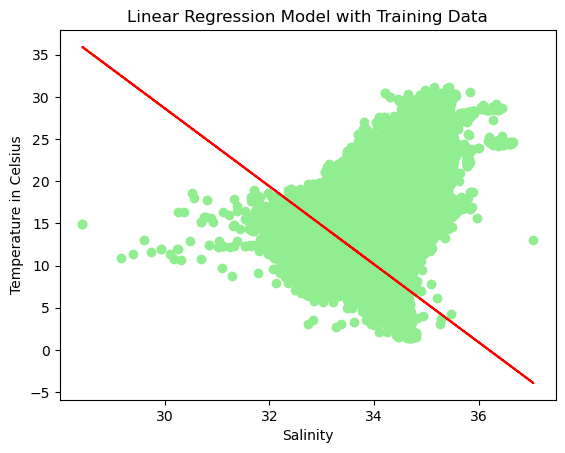

In [7]:
X = df_subset[['Salinity']]
y = df_subset[['Temperature in Celsius']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=1)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_train)

print(model.score(X_train, y_train))
plt.scatter(X_train, y_train, color="#90EE90")

# Add a line plot of the predicted values
plt.plot(X_train, y_pred, color='red')

# Add axis labels and a title
plt.xlabel('Salinity')
plt.ylabel('Temperature in Celsius')
plt.title('Linear Regression Model with Training Data')

# Show the plot
plt.show()

<a id="section-four"></a>
## Test

Text(0.5, 1.0, 'Linear Regression Model with Test Data')

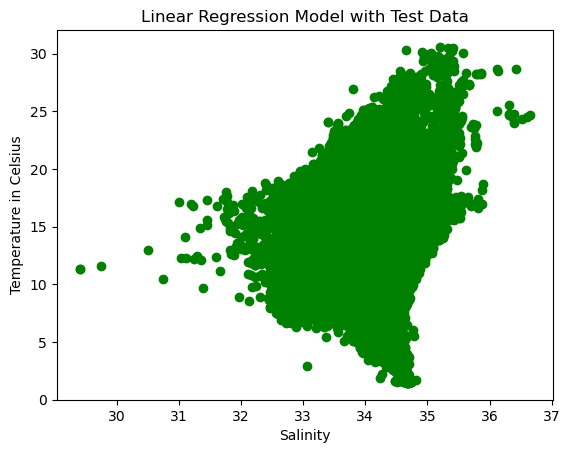

In [8]:
plt.scatter(X_test, y_test, color='green')
plt.xlabel('Salinity')
plt.ylabel('Temperature in Celsius')
plt.title('Linear Regression Model with Test Data')

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)
print(f"Train accuracy {round(lm.score(X_train, y_train)*100,2)}%" )
print(f"Test accuracy {round(lm.score(X_test, y_test)*100,2)}%" )

Train accuracy 25.55%
Test accuracy 25.43%


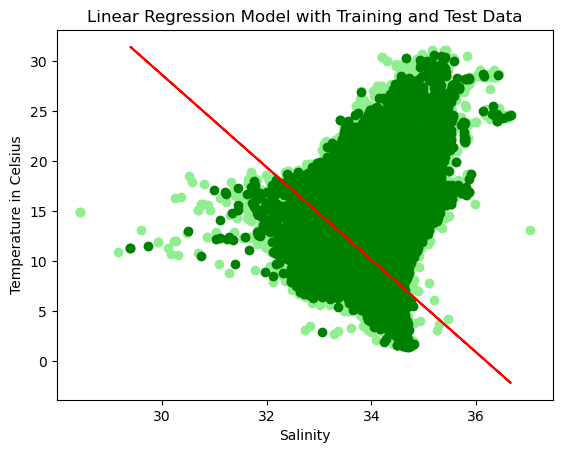

In [10]:
plt.scatter(X_train, y_train, color="#90EE90")
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_predict, color="red")
plt.xlabel('Salinity')
plt.ylabel('Temperature in Celsius')
plt.title('Linear Regression Model with Training and Test Data')
plt.show()

<a id="section-five"></a>

## Three Conclusions
1. The regression model was inaccurate, which I was able to determine as soon as I printed the .score().
2. Salinity can only explain 25% variance in the target variable, or temperature, but it is likely that other variables influence temperature.  I checked and decided not to re-cast my data for depth for example. 
3. Finally, since I also had a low score with the training and test data, I would not be able to predict with new unseen data is obtained. 
